In [1]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

## Reading input dataset

In [3]:
matches = pd.read_csv('matches 2008-2019.csv')

# The dimension of the dataset — rows and columns

In [4]:
matches.shape

(756, 18)

# Data in the dataset

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many matches we’ve got in the dataset?

In [8]:
matches['id'].max()

11415

# How many seasons we’ve got in the dataset?

In [9]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [10]:
len(matches['season'].unique())

12

# Total matches played at each Venue

In [11]:
venue_ser = matches['venue'].value_counts()
venue_ser

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [12]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

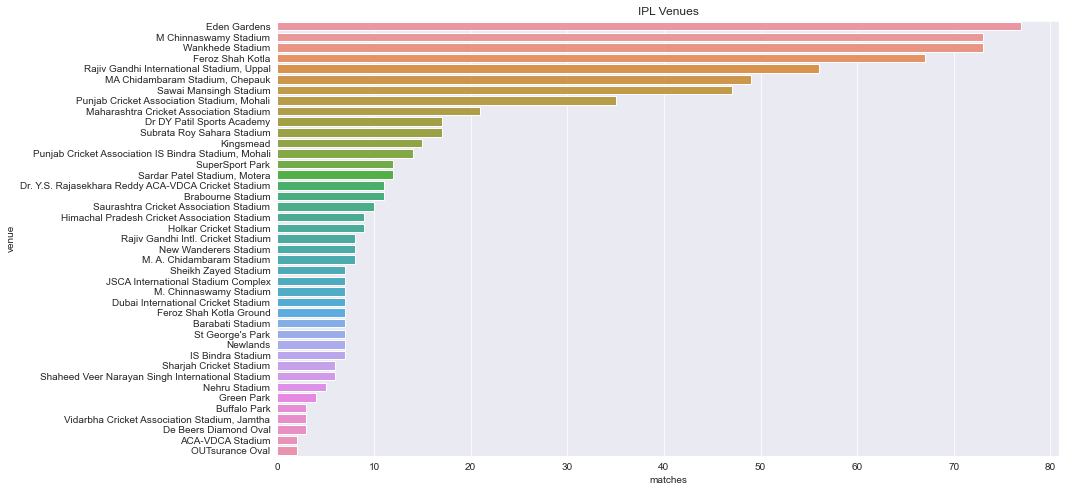

In [13]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [14]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


# Match Winners based on each seasons

In [15]:
teams_per_season = matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [16]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

In [17]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


C:\Users\Nandita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


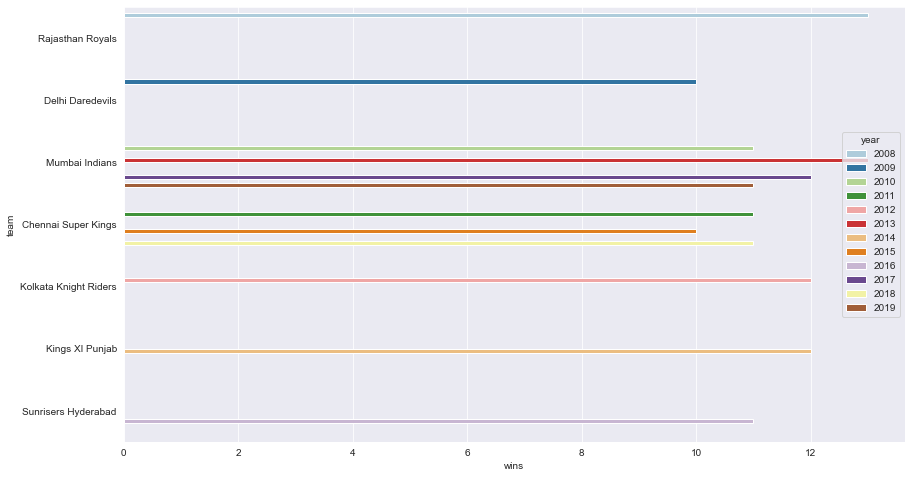

In [18]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

# Won the Toss… Bat First or Field

In [19]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

# Most Number of Man of the Match Awards

In [20]:
mvp_ser = matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [21]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


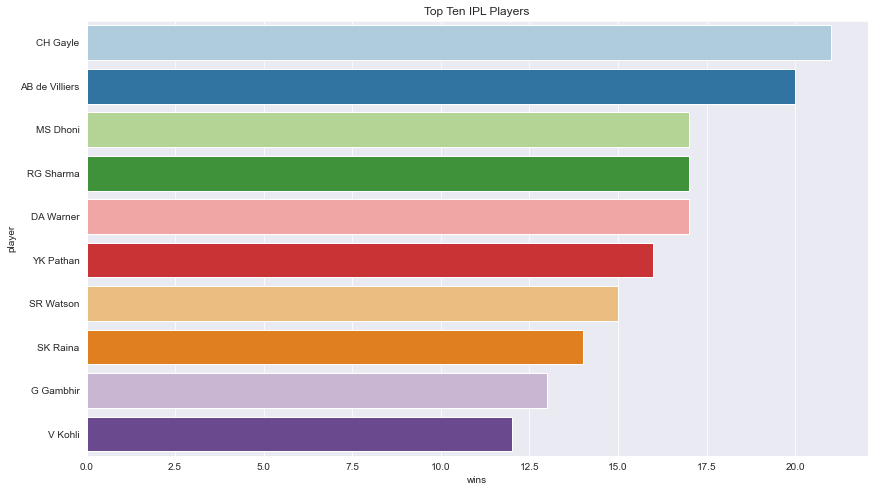

In [22]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

# Which Team had won by maximum runs?

In [23]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [24]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

# Which Team had won by maximum wickets? 

In [25]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# Which Team had won by (closest margin) minimum runs?

In [26]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# Which Team had won by minimum wickets?

In [27]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

# Which season had most number of matches?

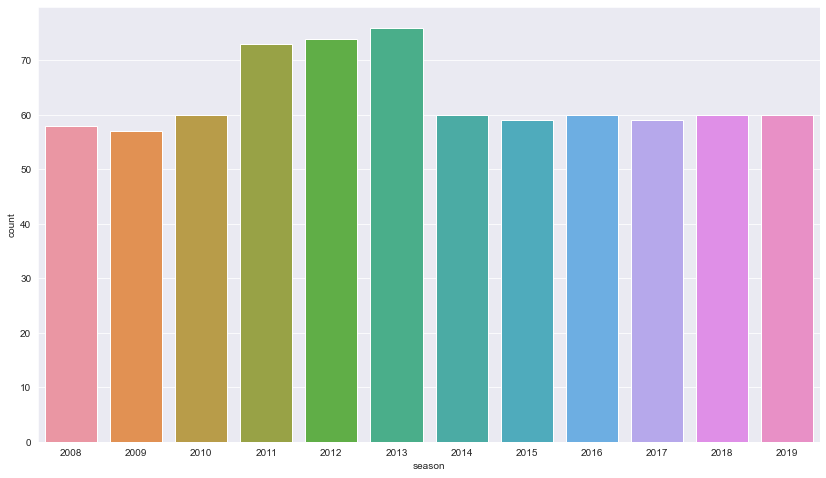

In [28]:
sns.countplot(x='season', data=matches)
plt.show()

# The most successful IPL Team

In [29]:
team_wins_ser = matches['winner'].value_counts()
team_wins_ser

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [30]:
team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [31]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


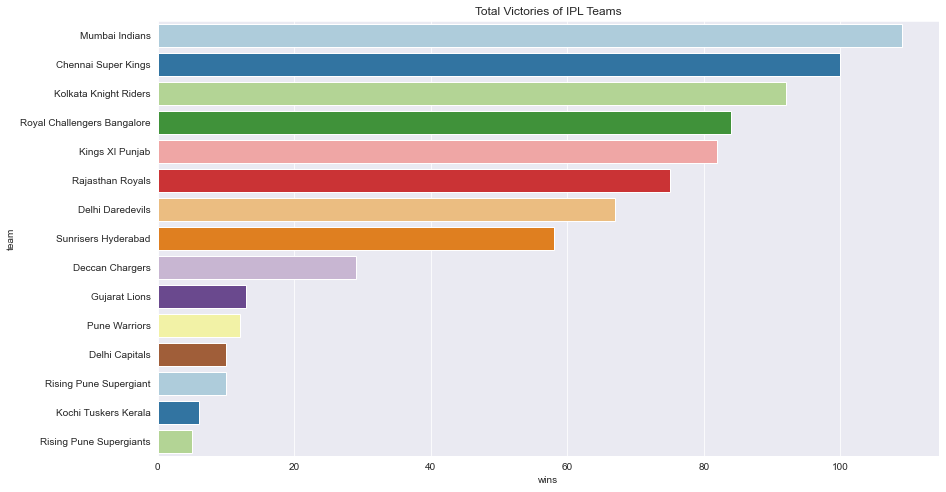

In [32]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

# Top player of the match Winners

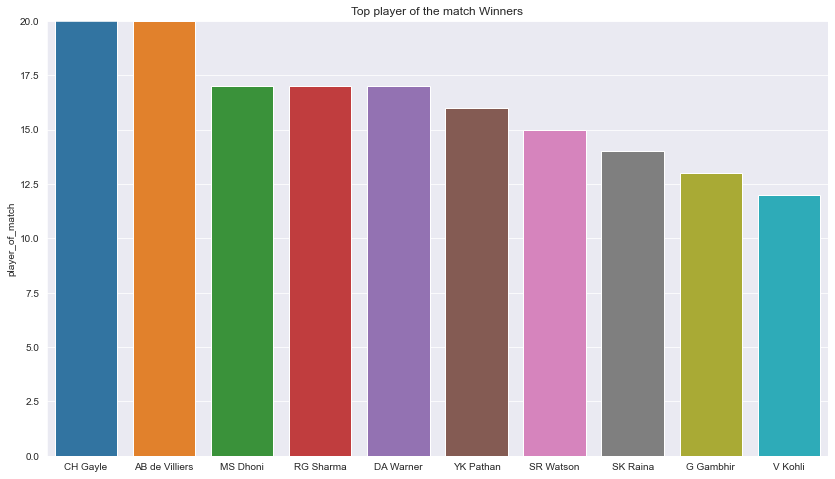

In [33]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

# The team that won the most number of toss

In [34]:
toss_ser = matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [35]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


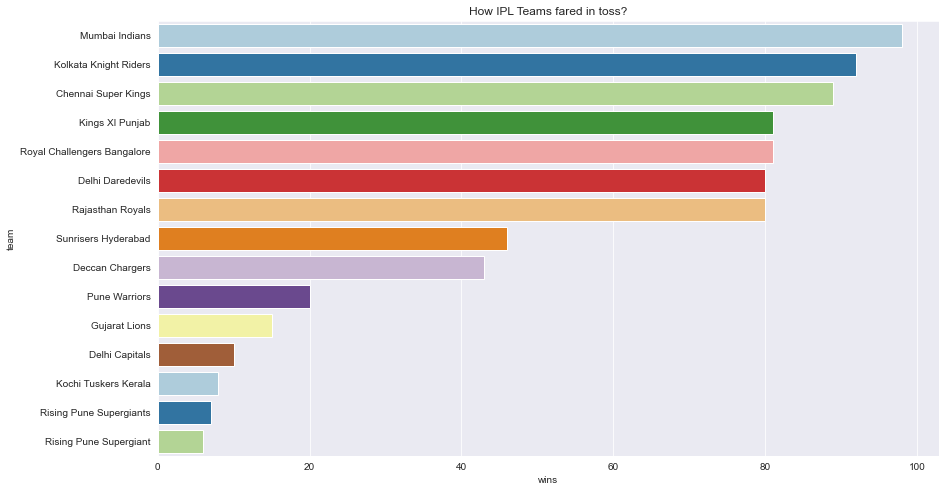

In [36]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

# Team Performance

In [37]:
matches[matches['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

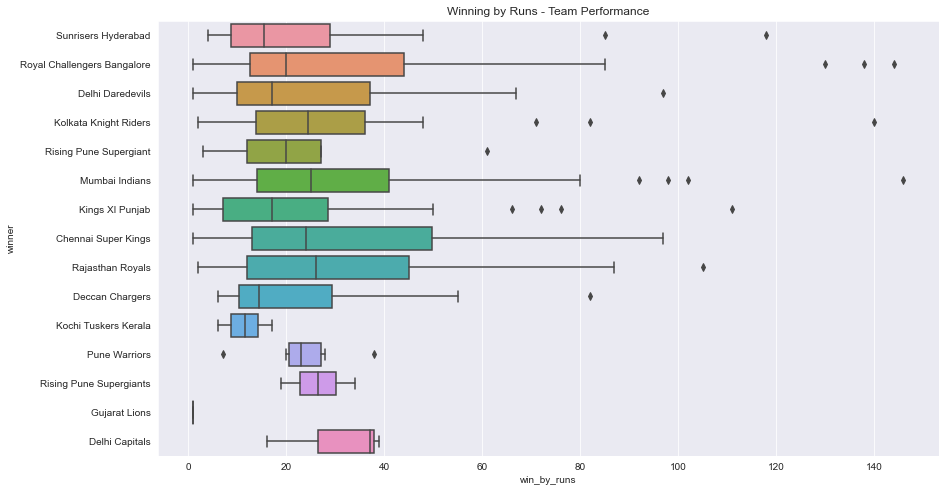

In [38]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

In [39]:
matches[matches['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Rising Pune Supergiants        7.0
Royal Challengers Bangalore    6.5
Pune Warriors                  6.5
Delhi Daredevils               6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kolkata Knight Riders          6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Delhi Capitals                 5.0
Name: win_by_wickets, dtype: float64

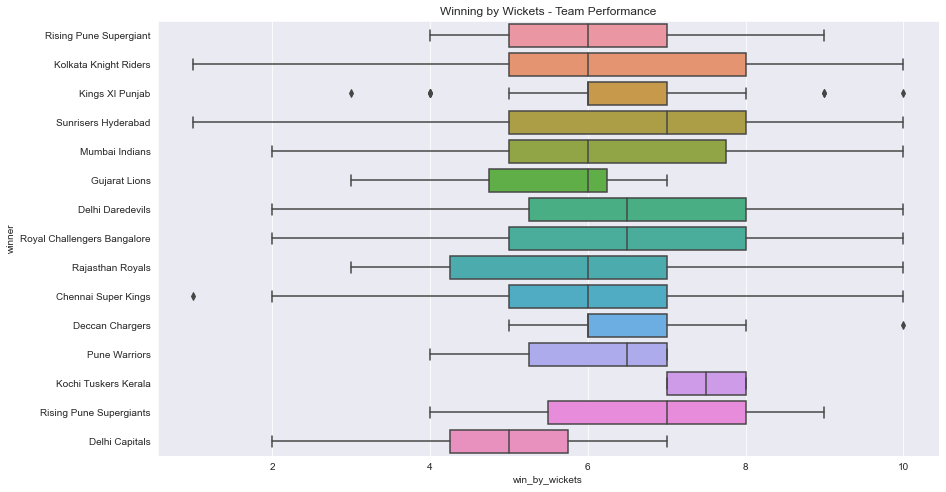

In [40]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()
